# Ex.01: Precipitation at Sierra Nevada (Spain)

The first example is devoted to analyze the precipitation regime at XXX strong seasonality is observed. In order to guarantee that the model captures this temporal variability a Box-Cox transformation of input data will be done. Part of this example is included in [Cobos et al, 2021](link). As in example 01 (Precipitation at Sierra Nevada), the steps will be the following: 

1. Load marinetools module
2. Read the input data (observations, hindcasted, etc ...) and create the dictionary to fit the non-stationary probability model (PM)
3. Call marinetools.temporal.analysis.marginalfit for fitting the parameters of the PM
4. Create the dictionary for the multivariate and temporal dependency
5. Call marinetools.temporal.analysis.dependency to fit the parameters of the autoregressive model
6. Create the dictionary with the properties of the simulations
7. Call marinetools.temporal.simulation.simulation to generate new statistically equivalent time series
8. Call several plotting functions included marinetools.graphics to assess the goodness of fit

## 1. Load marinetools module

The following code load the basic functions (read data, analysis, simulation and plots) included in marinetools

In [1]:
from marinetools.utils import read
from marinetools.temporal import analysis
from marinetools.graphics import plots

## 2. Read the input data and create the dictionary to make the marginal fit

For examples of reading files go to Ex01. The following code read the projections of freshwater river discharge from the RCP2.6 of the REMO2009 model in variable called "Qd". The input file is a xlsx file. As usually, some noise is included to ensure that the input variable is continuous and not discrete, which makes more difficult the analysis.

In [2]:
data = read.csv("data/distributed_precipitation.zip.csv", ts=True)
data = data.loc[data["pr"] > 1]

Once the data is read, it is needed to create the dictionary with the properties about the temporal fluctuation and the probability models. In this example, a single PM given by a Weibull of maxima which parameter will be expanded in time using the sinusoidal structure and with 10 terms will be given. As it was depicted before, this example has the problem that high variability is found. In order to facilitate the convergence of the optimization, a previous Box-Cox transformation will be given. This information is translated to the dictionary as follow.

In [3]:
params = {
    "pr": {
        "var": "pr",
        "non_stat_analysis": True,
        "basis_function": {"method": "trigonometric", "no_terms": 7},
        "fun": {0: "norm"},
        "transform": {"make": True, "plot": False, "method": "box-cox"},
    }
}


## 3. Make the marginal fit
The following code will fit the parameters to the data.

In [4]:
analysis.marginalfit(data, params["pr"])

2022-01-21 11:28:27.443 | INFO     | marinetools.temporal.analysis:marginalfit:121 - 
 Initializing MarineTools.temporal, v.1.0.0
Copyright (C) 2021 Environmental Fluid Dynamics Group (University of Granada)
This program is free software; you can redistribute it and/or modify it under
the terms of the GNU General Public License as published by the Free Software
Foundation; either version 3 of the License, or (at your option) any later 
version.
This program is distributed in the hope that it will be useful, but WITHOUT 
ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS
FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.
You should have received a copy of the GNU General Public License along with
this program; if not, write to the Free Software Foundation, Inc., 675 Mass
Ave, Cambridge, MA 02139, USA.
2022-01-21 11:28:27.443 | INFO     | marinetools.temporal.analysis:marginalfit:122 - Current Time = 11:28:27

2022-01-21 11:28:27.446

{'var': 'pr',
 'non_stat_analysis': True,
 'basis_function': {'method': 'trigonometric',
  'no_terms': 7,
  'periods': [1.0,
   0.5,
   0.3333333333333333,
   0.25,
   0.2,
   0.16666666666666666,
   0.14285714285714285],
  'order': 7},
 'fun': {0: 'norm'},
 'transform': {'make': True,
  'plot': False,
  'method': 'box-cox',
  'lambda': 0.0005772261962525381,
  'min': 0.013213682684716637},
 'no_param': {0: 2},
 'scipy': {0: True},
 'reduction': False,
 'no_tot_param': 2,
 'no_fun': 1,
 'basis_period': [1],
 'par': [1.7061344408231187,
  -0.14719415668629973,
  -0.46092755940150504,
  -0.4968905423933778,
  0.704607882292891,
  -0.04735554007219204,
  -0.39678647431832426,
  -0.20276939522686774,
  0.10921147456274144,
  0.11025477155278517,
  0.01931101515363325,
  -0.15584336221684308,
  0.3777827408419488,
  0.14024784576020657,
  -0.36007253699301456,
  0.7786082095589045,
  -0.3292548819844486,
  0.003239021470906549,
  0.10791592565447272,
  -0.011989113804816494,
  -0.0506493838

The result will be saved at the file "pr_weibull_max_nonst_1_trigonometric_5_SLSQP.json" in the folder "marginalfit". Read carefully the information that the tool gives in the shell to understand that the parameters are passed correctly. You can also read the json file with any text editor and follows the results as the previous dictionary.

## 4. Plots for verification

The following code will show the results from fit. First all, the non-stationary cumulative distribution function is plotted. The following code shows how to represent the normalize (left panel) and not normalized (right panel) plots using the subplot command from matplotlib.pyplot.

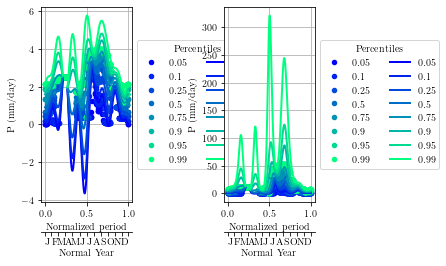

<AxesSubplot:xlabel='Normalized period', ylabel='P (mm/day)'>

In [5]:
import matplotlib.pyplot as plt

params = read.rjson("marginalfit/pr_norm_nonst_1_trigonometric_7_SLSQP")

fig, axs = plt.subplots(1, 2)
axs = axs.flatten()
params["transform"]["plot"] = True
plots.nonstationary_cdf(
    data,
    "pr",
    params,
    date_axis=True,
    ax=axs[0],
    file_name="to_axes",
)


params["transform"]["plot"] = False
plots.nonstationary_cdf(
    data,
    "pr",
    params,
    date_axis=True,
    ax=axs[1],
)

![Ex02_NS_CDF.png][Image]

[Image]: Ex02_NS_CDF.png "Non-stationary CDF, normalize and not."